In [134]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np

In [ ]:
#!c:/Users/toy_3/AppData/Local/Programs/Python/Python39/python.exe -m pip install pandas plotly dash

In [184]:
data = pd.read_csv("actual_pred_3.csv")
#data.head()
#data.tail()
'''data.info
data.isnull().sum()
data.columns
print(data['MONTH'].unique())
print(data.isnull().sum())
print(len(data['AMP'].unique()))
data.shape
'''
gdf = gpd.read_file("districts.shp")

data['PROV'] = data['PROV'].astype(str)
data['AMP'] = data['AMP'].astype(str)
gdf['PROV'] = gdf['ADM1_EN'].astype(str)
gdf['AMP'] = gdf['ADM2_EN'].astype(str)

print(gdf.shape)
gdf_merged = gdf.merge(data, on=['PROV', 'AMP'])
gdf_merged.shape


(928, 16)


(12650, 19)

In [ ]:
districts = gdf[['AMP', 'PROV']]
districts.drop_duplicates(inplace=True)
print(districts.shape)

dat = districts.merge(data, on = ['PROV', 'AMP'], how = 'left')
print(dat.shape)# 32 diff
dat.columns

In [ ]:
rows_to_expand = dat[dat['caseper100k'].isna()]
#print(rows_to_expand)

new_rows = []

for _, row in rows_to_expand.iterrows():
    for month in range(1, 13):
        new_row = row.copy()
        new_row['MONTH'] = month
        new_row['caseper100k'] = 0
        new_row['Pred'] = 0
        new_rows.append(new_row)

    
new_rows_df = pd.DataFrame(new_rows)
#print(new_rows_df)

df_filtered = dat[dat['caseper100k'].notna()]
df_final = pd.concat([df_filtered, new_rows_df], ignore_index = True)
print(df_final.shape)


gdf_merged = gdf.merge(df_final, on=['PROV', 'AMP'])
print(df_final)
print(df_final[df_final['AMP'] == 'Mueang Amnat Charoen'],)
print(df_final['MONTH'].unique())
df_final[df_final['MONTH'] == 4]



In [194]:
df_final[df_final['MONTH'] == 4]

,AMP,PROV,caseper100k,MONTH,Pred
11245,Noen Sa-Nga,Chaiyaphum,0.0,4.0,0.0
11257,Galyani Vadhana,Chiang Mai,0.0,4.0,0.0
11269,Ko Si Chang,Chon Buri,0.0,4.0,0.0
11281,Yang Sisurat,Maha Sarakham,0.0,4.0,0.0
11293,Khamcha-I,Mukdahan,0.0,4.0,0.0
11305,Nong Bun Mak,Nakhon Ratchasima,0.0,4.0,0.0
11317,Cha-Uat,Nakhon Si Thammarat,0.0,4.0,0.0
11329,Yi-Ngo,Narathiwat,0.0,4.0,0.0
11341,Ra-Ngae,Narathiwat,0.0,4.0,0.0
11353,Su-Ngai Kolok,Narathiwat,0.0,4.0,0.0


In [143]:
missing_data = gdf_merged[gdf_merged[['caseper100k', 'Pred', 'MONTH']].isnull().any(axis=1)]
print(missing_data)
#print(missing_data[missing_data['AMP'] == 'mueang yala'],)

Empty GeoDataFrame
Columns: [Shape_Leng, Shape_Area, ADM2_EN, ADM2_TH, ADM2_PCODE, ADM1_EN, ADM1_TH, ADM1_PCODE, ADM0_EN, ADM0_TH, ADM0_PCODE, layer, path, geometry, PROV, AMP, caseper100k, MONTH, Pred]
Index: []


In [8]:
def plot_heatmap(gdf, column, title = 'Heatmap',
                  cmap = 'Reds', figsize = (10, 12),
                  legend_label = None,
                  save_path = None, dpi = 300):
    if legend_label is None:
        legend_label = column
    
    fig, ax = plt.subplots(1, 1, figsize = figsize)
    gdf.plot(
        column = column,
        cmap = cmap,
        edgecolor = 'black',
        legend = True,
        legend_kwds = {'label' : legend_label, 'orientation': 'vertical'},
        ax = ax
    )

    ax.set_title(title, fontsize = 14)
    ax.axis('off')
    if save_path:
        plt.savefig(save_path, dpi = dpi, bbox_inches = 'tight')
    plt.show

In [73]:
def plot_heatmap_by_month(gdf, month, value_column='Pred', month_column='MONTH', num_colors=5):
    gdf_month = gdf[gdf[month_column] == month]

    if gdf_month.empty:
        raise ValueError(f"No data found for month {month}.")

    # ตรวจสอบว่าคอลัมน์มีอยู่
    if value_column not in gdf.columns:
        raise ValueError(f"Column '{value_column}' not found.")
    
    # สร้าง colormap
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "red_shades", ["#ffe5e5", "#ff9999", "#ff4d4d", "#e60000", "#800000"], N=num_colors
    )

    # สร้าง bin สำหรับสี
    bins = np.linspace(gdf_month[value_column].min(), gdf_month[value_column].max(), num_colors + 1)
    gdf_month['color_bin'] = np.digitize(gdf_month[value_column], bins, right=False) - 1

    # วาดกราฟ
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    gdf_month.plot(column=value_column,
                   cmap=cmap,
                   linewidth=1.0,
                   ax=ax,
                   edgecolor='black',
                   legend=True,
                   legend_kwds={'label': value_column,
                                'orientation': "vertical",
                                'shrink': 0.5,
                                'pad': 0.05})
    
    ax.set_title(f'Heatmap of {value_column} for Month {month}', fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

c:\Users\toy_3\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


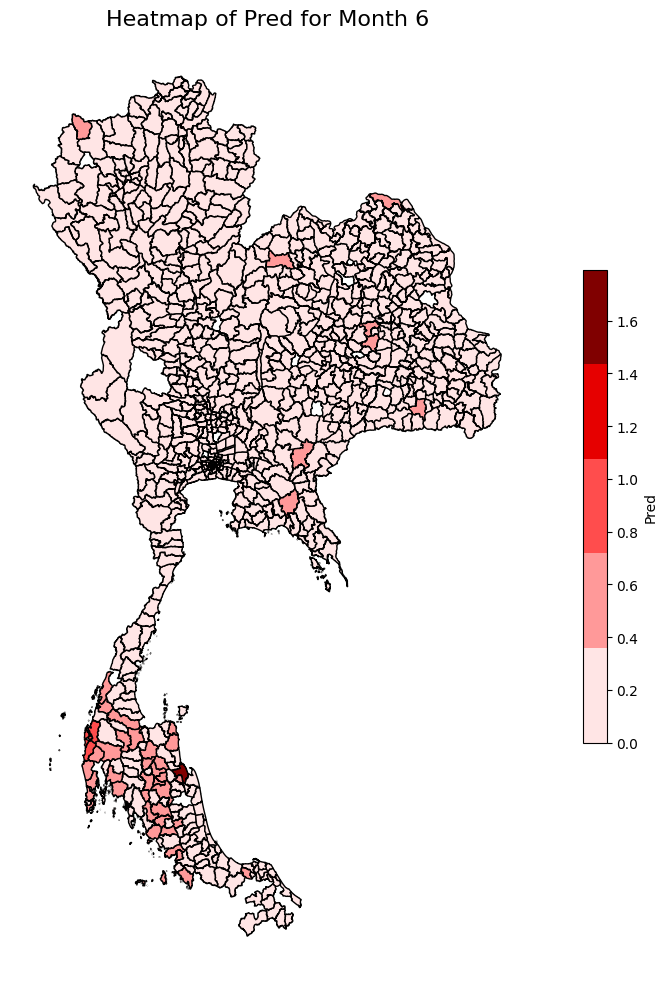

In [98]:
plot_heatmap_by_month(gdf = merged,
                      month = 6,
                     value_column='Pred')

In [ ]:
def plot_heatmap_class(gdf, value_column, title = 'heatmap by column', num_colors = 5):

    #check column
    if value_column not in gdf.columns:
        raise ValueError(f"column '{value_column}' no found.")
    
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "red_shades", ["#ffe5e5", "#ff9999", "#ff4d4d", "#e60000", "#800000"], N=num_colors
    )

    bins = np.linspace(gdf[value_column].min(), gdf[value_column].max(), num_colors + 1 )
    gdf['color_bin'] = np.digitize(gdf[value_column], bins, right=False) - 1
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    gdf.plot(column=value_column,
             cmap=cmap,
             linewidth=1.0,
             ax=ax,
             edgecolor='black',
             legend=True,
             legend_kwds={'label': value_column,
                          'orientation': "vertical",
                          'shrink': 0.5,
                          'pad' : 0.05})
    
    ax.set_title(title, fontsize = 16)
    ax.axis('off')
    plt.tight_layout()
    plt.show()



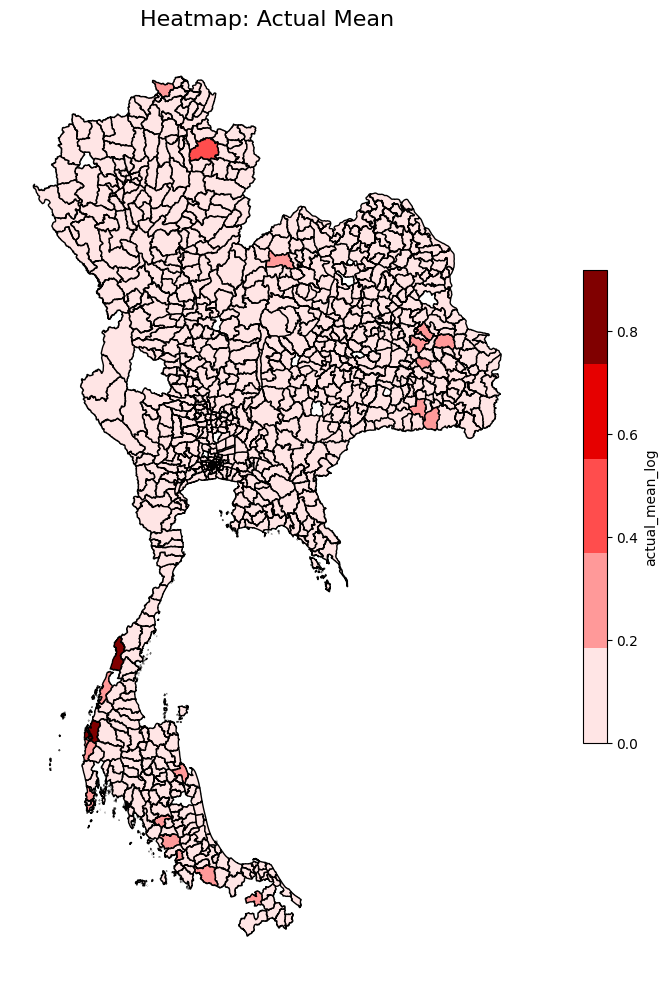

In [53]:
plot_heatmap_class(
    merged,
    value_column = 'actual_mean_log',
    title = 'Heatmap: Actual Mean'
)

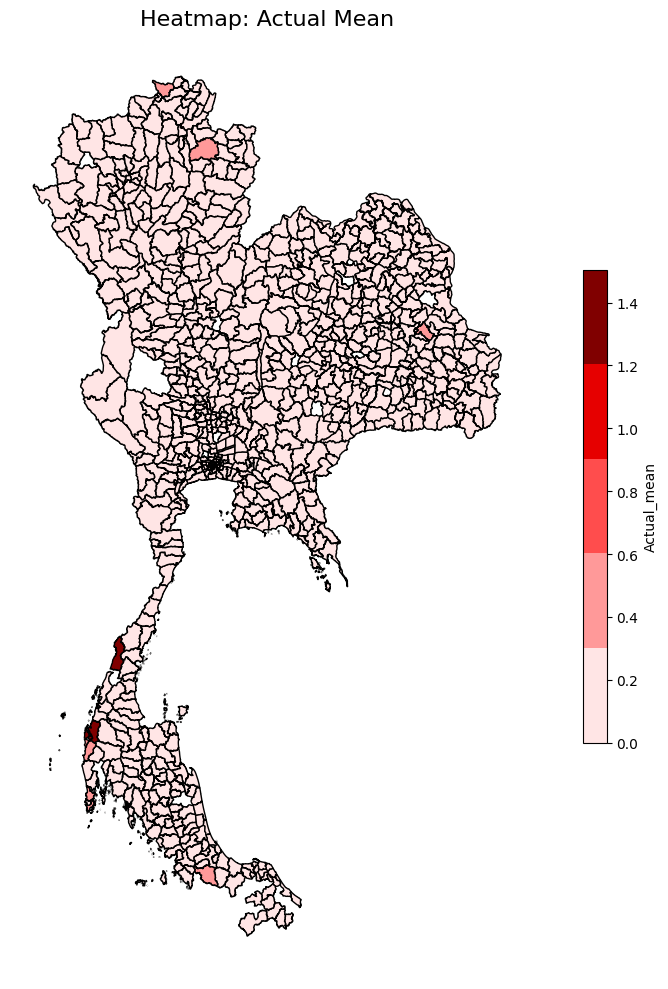

In [27]:
plot_heatmap_class(
    merged,
    value_column = 'Actual_mean',
    title = 'Heatmap: Actual Mean'
)

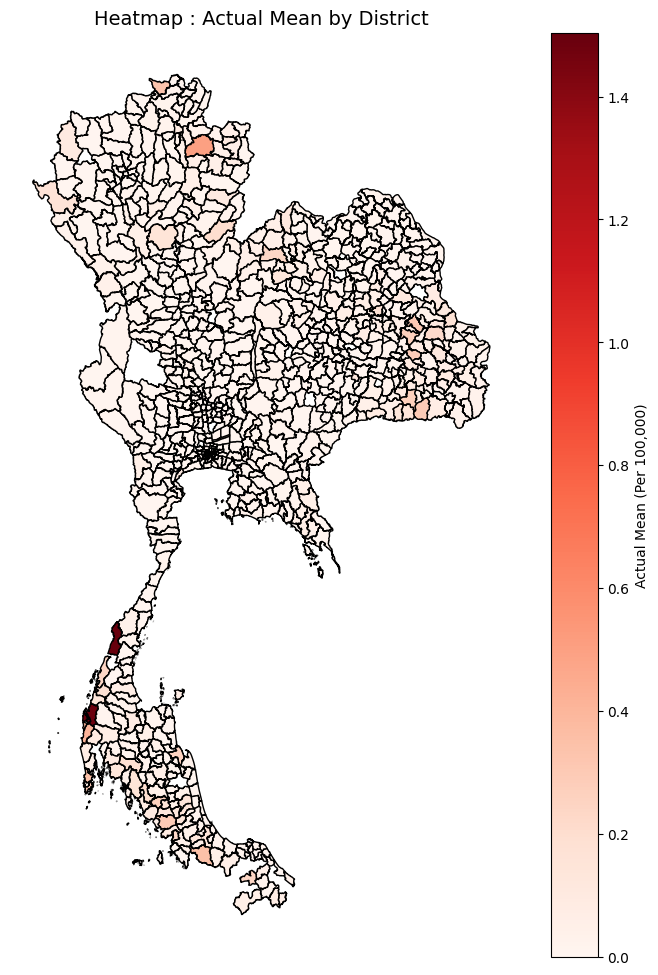

In [12]:
plot_heatmap(merged,
             column = 'Actual_mean',
             title = 'Heatmap : Actual Mean by District',
             cmap = 'Reds',
             legend_label = 'Actual Mean (Per 100,000)',
             save_path = 'Actual_mean.png')

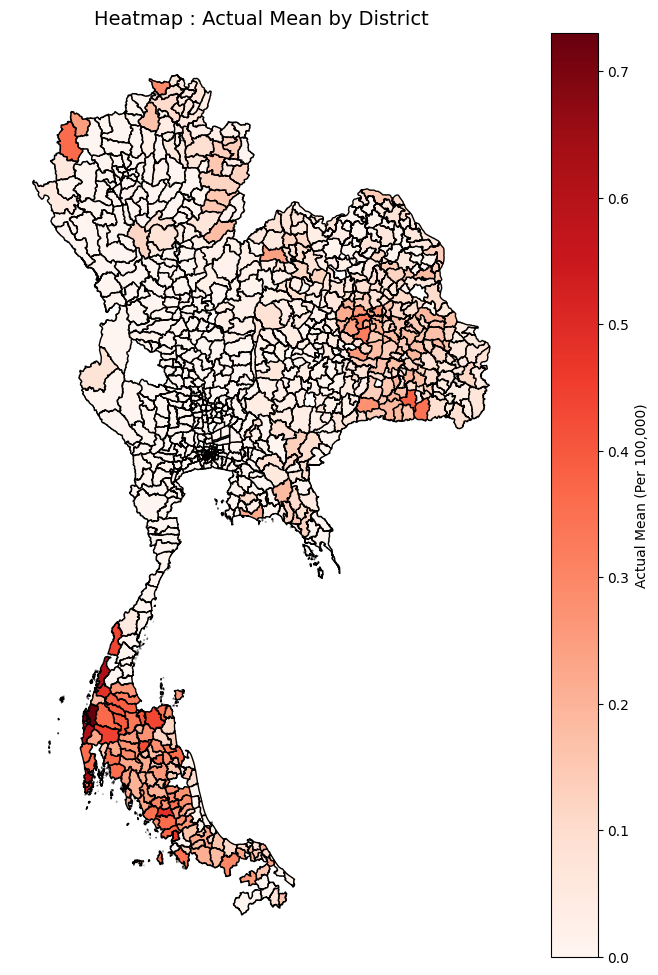

In [48]:
plot_heatmap(merged,
             column = 'Pred_mean',
             title = 'Heatmap : Actual Mean by District',
             cmap = 'Reds',
             legend_label = 'Actual Mean (Per 100,000)',
             save_path = 'Pred_mean.png')

In [50]:
type(result)

pandas.core.frame.DataFrame